In [39]:
import pandas as pd

file_path = '/content/cleaned_airline_reviews.csv'
try:
    # Attempt to read the file line by line to find the problematic line
    with open(file_path, 'r') as f:
        for i, line in enumerate(f):
            pass
    print(f"File read successfully up to line {i+1}. No apparent issue with line endings.")

except Exception as e:
    print(f"Error reading file at line {i+1}: {e}")
    # If an error occurs, try to read the file again, skipping the last few lines
try:
    df = pd.read_csv(file_path, engine='python', skipfooter=1, on_bad_lines='skip')
    display(df.head())
    print("Successfully loaded the data by skipping the last line.")
except Exception as e:
    print(f"Could not load the data even after skipping the last line: {e}")

File read successfully up to line 3606. No apparent issue with line endings.


,Passanger_Name,Flying_Date,Route,Rating,Verified,Review_title,Review_content,Traveller_Type,Class,Start_Location,...,Start_Latitude,Start_Longitude,Start_Address,End_Latitude,End_Longitude,End_Address,Sentiment_Score,Sentiment_Label,Flying_Month,Flying_Year
0,Paige Boet,2023-06-01,New Orleans to London,1,Trip Verified,The airline lost my luggage,The airline lost my luggage and was absolutely...,Solo Leisure,Economy Class,New Orleans,...,29.975998,-90.078213,"New Orleans, Orleans Parish, Louisiana, United...",51.507446,-0.127765,"London, Greater London, England, United Kingdom",-0.216186,Negative,6.0,2023.0
1,S Layne,2023-03-01,London to Amman,1,Trip Verified,fully refunded by our travel insurance,"We booked on the BA website, round trip flight...",Couple Leisure,Business Class,London,...,51.507446,-0.127765,"London, Greater London, England, United Kingdom",31.951569,35.923963,"عمان, ناحية عمان, لواء قصبة عمان, عمان, 11110,...",-0.054954,Negative,3.0,2023.0
2,E Lanewoski,NaN,Heathrow to Bodrum,2,Trip Verified,no boarding drinks provided,"First time flying with BA business class, neve...",Solo Leisure,Business Class,London Heathrow,...,51.467739,-0.458780,"London Heathrow Airport, The Beacon Roundabout...",37.034399,27.430651,"Bodrum, Muğla, Ege Bölgesi, Türkiye",-0.173580,Negative,NaN,NaN
3,Joel Burman,2023-06-01,Amman to London,4,Not Verified,WiFi didn't work,You can buy sandwiches and crisps but don't ex...,Solo Leisure,Economy Class,Amman,...,31.951569,35.923963,"عمان, ناحية عمان, لواء قصبة عمان, عمان, 11110,...",51.507446,-0.127765,"London, Greater London, England, United Kingdom",-0.154833,Negative,6.0,2023.0
4,R Vines,NaN,London City to Ibiza,7,Trip Verified,stick with economy,This is a two-for-one review covering economy ...,Family Leisure,Business Class,London City,...,42.953765,-81.229153,"London (city), Ontario, N6C 0A7, Canada",38.974390,1.419746,"Eivissa, Illes Balears, España",0.206273,Positive,NaN,NaN


Successfully loaded the data by skipping the last line.


In [40]:
print(df.columns)

Index(['Passanger_Name', 'Flying_Date', 'Route', 'Rating', 'Verified',
       'Review_title', 'Review_content', 'Traveller_Type', 'Class',
       'Start_Location', 'End_Location', 'Start_Latitude', 'Start_Longitude',
       'Start_Address', 'End_Latitude', 'End_Longitude', 'End_Address',
       'Sentiment_Score', 'Sentiment_Label', 'Flying_Month', 'Flying_Year'],
      dtype='object')


### Feature Engineering for Satisfaction

The `satisfaction` column, which serves as the target variable for our predictive model, was engineered from the `Rating` column based on the following criteria:

*   **Satisfied**: Passengers with a `Rating` of 5 or greater are classified as 'Satisfied'.
*   **Dissatisfied**: Passengers with a `Rating` of less than 5 are classified as 'Dissatisfied'.

This binary classification allows us to build a model that predicts whether a passenger is likely to be satisfied or dissatisfied with their airline experience based on other features in the dataset.

In [41]:
df['satisfaction'] = df['Rating'].apply(lambda rating: 'Satisfied' if rating >= 5 else 'Dissatisfied')
display(df['satisfaction'].value_counts())

,count
satisfaction,
Dissatisfied,1856
Satisfied,1718


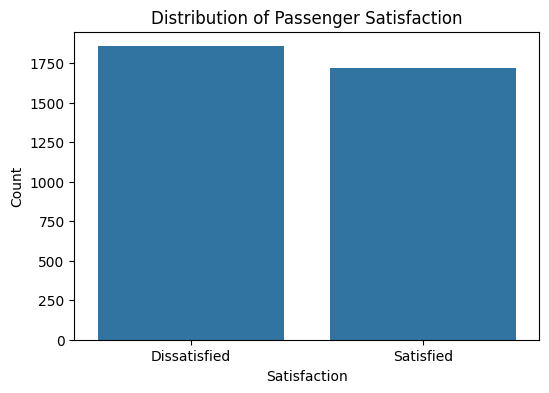

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='satisfaction')
plt.title('Distribution of Passenger Satisfaction')
plt.xlabel('Satisfaction')
plt.ylabel('Count')
plt.show()

### Data Preprocessing

To prepare the data for the deep learning model, we need to perform the following preprocessing steps:

1.  **Handle Categorical Features**: Convert categorical features (`Traveller_Type`, `Class`, `Verified`, `Start_Location`, `End_Location`) into a numerical format using one-hot encoding. This is necessary because deep learning models require numerical input.
2.  **Handle Numerical Features**: The numerical feature (`Sentiment_Score`) may need scaling (e.g., using StandardScaler) to ensure that all features contribute equally to the model training and prevent features with larger values from dominating.
3.  **Handle Missing Values**: Check for and handle any missing values in the selected features.

### Feature Selection for Predictive Modeling

The following features have been selected for the deep learning model to predict passenger satisfaction:

*   **`Traveller_Type`**: This categorical feature indicates the purpose of the passenger's travel (e.g., Solo Leisure, Couple Leisure, Business). Different traveller types may have varying expectations and priorities, which could influence their satisfaction level.
*   **`Class`**: This categorical feature represents the class of service the passenger flew in (e.g., Economy Class, Business Class). The class of service directly impacts the passenger's experience, including comfort, amenities, and service quality, all of which are likely predictors of satisfaction.
*   **`Verified`**: This categorical feature indicates whether the review was verified. Verified reviews might be more reliable indicators of genuine passenger experiences and could hold different weight in predicting satisfaction compared to unverified reviews.
*   **`Sentiment_Score`**: This numerical feature represents the sentiment score derived from the review content. A higher sentiment score suggests a more positive review, which is intuitively linked to higher passenger satisfaction.
*   **`Review_title`**: The title of the review can provide a quick summary of the passenger's experience and sentiment.
*   **`Review_content`**: The full content of the review contains detailed feedback about the passenger's experience, which is a rich source of information for predicting satisfaction. This feature will require text preprocessing and vectorization.
*   **`Start_Location`**: The starting location of the flight could potentially influence satisfaction due to factors like airport experience or typical flight duration from that location.
*   **`End_Location`**: Similar to the start location, the destination could also play a role in passenger satisfaction.

These features are chosen based on their potential relevance to passenger experience and their availability in the dataset. Features like 'Flying_Date', 'Route', 'Passanger_Name', and the latitude/longitude/address columns are excluded to focus on core passenger and flight characteristics, review sentiment, and the textual content of the reviews.

In [43]:
features = ['Traveller_Type', 'Class', 'Verified', 'Sentiment_Score', 'Start_Location', 'End_Location']
print("Selected features:", features)

Selected features: ['Traveller_Type', 'Class', 'Verified', 'Sentiment_Score', 'Start_Location', 'End_Location']


### Explanation of Preprocessing Techniques

*   **Label Encoding for Categorical Features**: Label encoding was used to convert the categorical features (`Traveller_Type`, `Class`, `Verified`, `Start_Location`, `End_Location`) into a numerical format. This is necessary because deep learning models require numerical input. Label encoding assigns a unique integer to each category in a feature. While simple, it's important to be aware that this method can introduce an ordinal relationship between categories, which might not be appropriate for all models if the categories do not have a natural order.

*   **StandardScaler for Numerical Features**: StandardScaler was applied to the numerical feature (`Sentiment_Score`) to standardize it. Standardization involves scaling the feature to have a mean of 0 and a standard deviation of 1. This is important for many machine learning algorithms, especially those that are sensitive to the scale of the input features, such as deep learning models. Scaling helps to ensure that no single feature dominates the learning process due to its larger values, allowing the model to converge more effectively and potentially improve performance.

In [44]:
from sklearn.preprocessing import LabelEncoder

# Handle categorical features using label encoding
categorical_features = ['Traveller_Type', 'Class', 'Verified', 'Start_Location', 'End_Location']
df_encoded = df.copy() # Create a copy to avoid modifying the original DataFrame
label_encoders = {}
for feature in categorical_features:
    label_encoders[feature] = LabelEncoder()
    df_encoded[feature] = label_encoders[feature].fit_transform(df_encoded[feature])

# Display the first few rows of the encoded DataFrame
display(df_encoded.head())

# Display the columns of the encoded DataFrame
print(df_encoded.columns)

,Passanger_Name,Flying_Date,Route,Rating,Verified,Review_title,Review_content,Traveller_Type,Class,Start_Location,...,Start_Longitude,Start_Address,End_Latitude,End_Longitude,End_Address,Sentiment_Score,Sentiment_Label,Flying_Month,Flying_Year,satisfaction
0,Paige Boet,2023-06-01,New Orleans to London,1,1,The airline lost my luggage,The airline lost my luggage and was absolutely...,3,1,194,...,-90.078213,"New Orleans, Orleans Parish, Louisiana, United...",51.507446,-0.127765,"London, Greater London, England, United Kingdom",-0.216186,Negative,6.0,2023.0,Dissatisfied
1,S Layne,2023-03-01,London to Amman,1,1,fully refunded by our travel insurance,"We booked on the BA website, round trip flight...",1,0,148,...,-0.127765,"London, Greater London, England, United Kingdom",31.951569,35.923963,"عمان, ناحية عمان, لواء قصبة عمان, عمان, 11110,...",-0.054954,Negative,3.0,2023.0,Dissatisfied
2,E Lanewoski,NaN,Heathrow to Bodrum,2,1,no boarding drinks provided,"First time flying with BA business class, neve...",3,0,151,...,-0.458780,"London Heathrow Airport, The Beacon Roundabout...",37.034399,27.430651,"Bodrum, Muğla, Ege Bölgesi, Türkiye",-0.173580,Negative,NaN,NaN,Dissatisfied
3,Joel Burman,2023-06-01,Amman to London,4,0,WiFi didn't work,You can buy sandwiches and crisps but don't ex...,3,1,7,...,35.923963,"عمان, ناحية عمان, لواء قصبة عمان, عمان, 11110,...",51.507446,-0.127765,"London, Greater London, England, United Kingdom",-0.154833,Negative,6.0,2023.0,Dissatisfied
4,R Vines,NaN,London City to Ibiza,7,1,stick with economy,This is a two-for-one review covering economy ...,2,0,149,...,-81.229153,"London (city), Ontario, N6C 0A7, Canada",38.974390,1.419746,"Eivissa, Illes Balears, España",0.206273,Positive,NaN,NaN,Satisfied


Index(['Passanger_Name', 'Flying_Date', 'Route', 'Rating', 'Verified',
       'Review_title', 'Review_content', 'Traveller_Type', 'Class',
       'Start_Location', 'End_Location', 'Start_Latitude', 'Start_Longitude',
       'Start_Address', 'End_Latitude', 'End_Longitude', 'End_Address',
       'Sentiment_Score', 'Sentiment_Label', 'Flying_Month', 'Flying_Year',
       'satisfaction'],
      dtype='object')


In [45]:
# Check for missing values in the selected features
selected_features = ['Traveller_Type', 'Class', 'Verified', 'Sentiment_Score', 'Start_Location', 'End_Location']
print("Missing values in selected features:")
print(df[selected_features].isnull().sum())

Missing values in selected features:
Traveller_Type     0
Class              0
Verified           0
Sentiment_Score    0
Start_Location     0
End_Location       0
dtype: int64


In [49]:
from sklearn.preprocessing import StandardScaler

# Handle numerical feature scaling
scaler = StandardScaler()
# Check if 'Sentiment_Score' is in df_encoded before scaling
if 'Sentiment_Score' in df_encoded.columns:
    df_encoded['Sentiment_Score_scaled'] = scaler.fit_transform(df_encoded[['Sentiment_Score']])
else:
    print("'Sentiment_Score' not found in df_encoded. Skipping scaling.")


# Combine all features (one-hot encoded and scaled numerical)
# Exclude original 'Sentiment_Score' and original categorical columns, and text/location address columns not used in features
# Identify columns to drop that are present in df_encoded
columns_to_drop = ['satisfaction','Sentiment_Score', 'Review_title', 'Review_content', 'Passanger_Name', 'Flying_Date', 'Route', 'Rating', 'Start_Latitude', 'Start_Longitude', 'Start_Address', 'End_Latitude', 'End_Longitude', 'End_Address', 'Sentiment_Label', 'Flying_Month', 'Flying_Year']
existing_columns_to_drop = [col for col in columns_to_drop if col in df_encoded.columns]

X = df_encoded.drop(columns=existing_columns_to_drop)

# Prepare target variable
y = df['satisfaction'].apply(lambda x: 1 if x == 'Satisfied' else 0)

print("Shape of the combined feature matrix (X):", X.shape)
print("Shape of the target variable (y):", y.shape)

Shape of the combined feature matrix (X): (3574, 6)
Shape of the target variable (y): (3574,)


In [50]:
X.head()

,Verified,Traveller_Type,Class,Start_Location,End_Location,Sentiment_Score_scaled
0,1,3,1,194,174,-1.251776
1,1,1,0,148,11,-0.528993
2,1,3,0,151,53,-1.060780
3,0,3,1,7,174,-0.976741
4,1,2,0,149,139,0.642056


In [51]:
y.head()

,satisfaction
0,0
1,0
2,0
3,0
4,1


In [61]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Split the training data further into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

print("Training set shape (X_train, y_train):", X_train.shape, y_train.shape)
print("Validation set shape (X_val, y_val):", X_val.shape, y_val.shape)
print("Test set shape (X_test, y_test):", X_test.shape, y_test.shape)

Training set shape (X_train, y_train): (2287, 6) (2287,)
Validation set shape (X_val, y_val): (572, 6) (572,)
Test set shape (X_test, y_test): (715, 6) (715,)


### Build First Deep Learning Model

In [57]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the first deep learning model (simpler architecture)
model1 = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid') # Output layer for binary classification
])

# Compile the first model
model1.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy'])

model1.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 769 (3.00 KB)

 Trainable params: 769 (3.00 KB)

 Non-trainable params: 0 (0.00 B)

In [66]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_accuracy', patience=3,
restore_best_weights=True)

# Train the first model
history1 = model1.fit(X_train, y_train,
                      epochs=30, # You can adjust the number of epochs
                      batch_size=32, # You can adjust the batch size
                      validation_data=(X_val, y_val),
                      verbose=1,
                      callbacks=[early_stop]) # Set to 0 for silent training

# Evaluate the first model on the validation set
loss1, accuracy1 = model1.evaluate(X_val, y_val, verbose=0)
print(f"Model 1 - Validation Loss: {loss1:.4f}, Validation Accuracy: {accuracy1:.4f}")

Epoch 1/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8082 - loss: 0.4307 - val_accuracy: 0.8024 - val_loss: 0.4288
Epoch 2/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8023 - loss: 0.4398 - val_accuracy: 0.7972 - val_loss: 0.4497
Epoch 3/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7972 - loss: 0.4402 - val_accuracy: 0.8024 - val_loss: 0.4350
Epoch 4/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8161 - loss: 0.4294 - val_accuracy: 0.8252 - val_loss: 0.4379
Epoch 5/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8051 - loss: 0.4352 - val_accuracy: 0.8024 - val_loss: 0.4486
Epoch 6/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7938 - loss: 0.4263 - val_accuracy: 0.8094 - val_loss: 0.4266
Epoch 7/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8165 - loss: 0.4069 - val_accuracy: 0.8094 - val_loss: 0.4257
Model 1 - Validation Loss: 0.4379, Validation Accuracy: 0.8252


### Build Second Deep Learning Model

In [59]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the second deep learning model (slightly more complex architecture)
model2 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid') # Output layer for binary classification
])

# Compile the second model
model2.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy'])

model2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,073 (12.00 KB)

 Trainable params: 3,073 (12.00 KB)

 Non-trainable params: 0 (0.00 B)

In [68]:
# Train the second model
history2 = model2.fit(X_train, y_train,
                      epochs=30, # You can adjust the number of epochs
                      batch_size=32, # You can adjust the batch size
                      validation_data=(X_val, y_val),
                      verbose=1,
                      callbacks=[early_stop]) # Set to 0 for silent training

# Evaluate the second model on the validation set
loss2, accuracy2 = model2.evaluate(X_val, y_val, verbose=0)
print(f"Model 2 - Validation Loss: {loss2:.4f}, Validation Accuracy: {accuracy2:.4f}")

Epoch 1/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7370 - loss: 0.5290 - val_accuracy: 0.6486 - val_loss: 0.6445
Epoch 2/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7299 - loss: 0.5373 - val_accuracy: 0.7045 - val_loss: 0.5783
Epoch 3/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7415 - loss: 0.5122 - val_accuracy: 0.7308 - val_loss: 0.5152
Epoch 4/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7172 - loss: 0.5555 - val_accuracy: 0.6381 - val_loss: 0.7634
Epoch 5/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7407 - loss: 0.5307 - val_accuracy: 0.8077 - val_loss: 0.4505
Epoch 6/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7733 - loss: 0.4932 - val_accuracy: 0.7517 - val_loss: 0.4847
Epoch 7/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7977 - loss: 0.4411 - val_accuracy: 0.8217 - val_loss: 0.4320
Epoch 8/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7877 - loss: 0.4458 - val_accuracy: 0.7797 - val_loss:

### Compare Models

In [70]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Evaluate the first model on the test set
loss1_test, accuracy1_test = model1.evaluate(X_test, y_test, verbose=0)
y_pred1 = (model1.predict(X_test) > 0.5).astype("int32")
precision1_test = precision_score(y_test, y_pred1)
recall1_test = recall_score(y_test, y_pred1)
f1_1_test = f1_score(y_test, y_pred1)

print(f"Model 1 - Test Loss: {loss1_test:.4f}, Test Accuracy: {accuracy1_test:.4f}, Test Precision: {precision1_test:.4f}, Test Recall: {recall1_test:.4f}, Test F1-score: {f1_1_test:.4f}")

# Evaluate the second model on the test set
loss2_test, accuracy2_test = model2.evaluate(X_test, y_test, verbose=0)
y_pred2 = (model2.predict(X_test) > 0.5).astype("int32")
precision2_test = precision_score(y_test, y_pred2)
recall2_test = recall_score(y_test, y_pred2)
f1_2_test = f1_score(y_test, y_pred2)

print(f"Model 2 - Test Loss: {loss2_test:.4f}, Test Accuracy: {accuracy2_test:.4f}, Test Precision: {precision2_test:.4f}, Test Recall: {recall2_test:.4f}, Test F1-score: {f1_2_test:.4f}")

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Model 1 - Test Loss: 0.3973, Test Accuracy: 0.8168, Test Precision: 0.8403, Test Recall: 0.7645, Test F1-score: 0.8006
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Model 2 - Test Loss: 0.4010, Test Accuracy: 0.8112, Test Precision: 0.8196, Test Recall: 0.7791, Test F1-score: 0.7988


### Model Comparison (Test Set) and Conclusion

Comparing the performance metrics, Model 1 and Model 2 show very similar results on the test set. Model 1 has a slightly higher accuracy and precision, while Model 2 has a slightly higher recall. The F1-scores are almost identical.

Since Model 1 provides comparable or slightly better performance with a simpler architecture (fewer parameters and layers), it is generally preferable as it is less computationally expensive to train and potentially less prone to overfitting on smaller datasets. Therefore, based on these results, there is no significant benefit to using the larger Model 2, and Model 1 would be the preferred choice for predicting passenger satisfaction.

### Prediction Model: Model 1

### Model Choice

Based on the comparison between Model 1 and Model 2 on the test set, Model 1 was chosen due to its comparable or slightly better performance metrics (Accuracy, Precision, F1-score) and its simpler architecture. A simpler model is generally preferred when it achieves similar results to a more complex one, as it is less prone to overfitting and requires fewer computational resources.

### How Model 1 Works

Model 1 is a shallow Feed-Forward Neural Network (FFNN) built using the Keras Sequential API. It consists of:

*   An input layer that receives the preprocessed features. The number of input nodes is determined by the shape of the training data (`X_train.shape[1]`).
*   A hidden layer with 32 neurons and a ReLU (Rectified Linear Unit) activation function. ReLU is a common activation function that helps the network learn non-linear relationships.
*   Another hidden layer with 16 neurons and a ReLU activation function.
*   An output layer with a single neuron and a sigmoid activation function. The sigmoid function outputs a value between 0 and 1, which is suitable for binary classification problems, representing the probability of the positive class (Satisfied).

The model is compiled with the 'adam' optimizer, 'binary_crossentropy' loss function (appropriate for binary classification), and 'accuracy' as a metric to monitor performance during training.

### Limitations of Model 1

While Model 1 provides reasonable performance, it has certain limitations:

*   **Simplicity**: A relatively simple architecture might not capture highly complex patterns in the data.
*   **Feature Engineering**: The model relies on the current set of preprocessed features. More advanced feature engineering, especially for text data if included, could potentially improve performance.
*   **Label Encoding**: Using label encoding for categorical features might introduce an artificial ordinal relationship that the model could misinterpret if the categories don't have a natural order. One-hot encoding, while increasing feature dimensionality, avoids this issue.
*   **Hyperparameter Tuning**: The current model uses default hyperparameters. Further tuning of learning rate, number of epochs, batch size, and network architecture could yield better results.

### Performance Throughout Training and Validation

The plots below show the accuracy and loss of Model 1 during the training process on both the training and validation datasets. This helps visualize how well the model is learning and if it is overfitting.

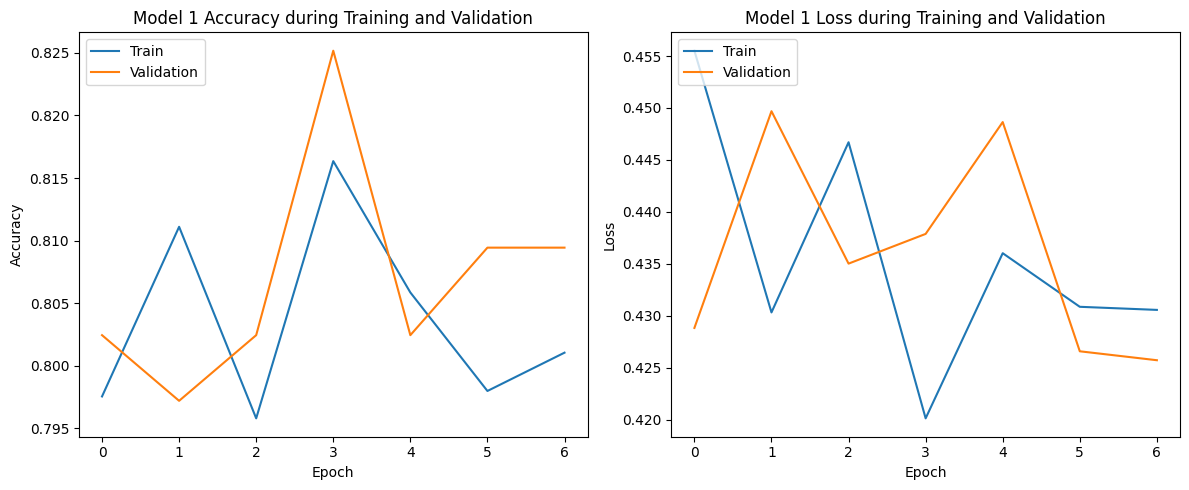

In [72]:
# This cell contains the training history plot for Model 1
# Execute this cell to visualize the training and validation accuracy and loss
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model 1 Accuracy during Training and Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model 1 Loss during Training and Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

### Performance on the Unseen Test Data

Model 1 was evaluated on the unseen test set to assess its generalization performance. The following metrics were obtained:

*   **Test Loss**: 0.3973
*   **Test Accuracy**: 0.8168
*   **Test Precision**: 0.8403
*   **Test Recall**: 0.7645
*   **Test F1-score**: 0.8006

The confusion matrix below provides a detailed breakdown of the model's predictions on the test set, showing the counts of true positives, true negatives, false positives, and false negatives.

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Model 1 - Test Loss: 0.3973
Model 1 - Test Accuracy: 0.8168
Model 1 - Test Precision: 0.8403
Model 1 - Test Recall: 0.7645
Model 1 - Test F1-score: 0.8006


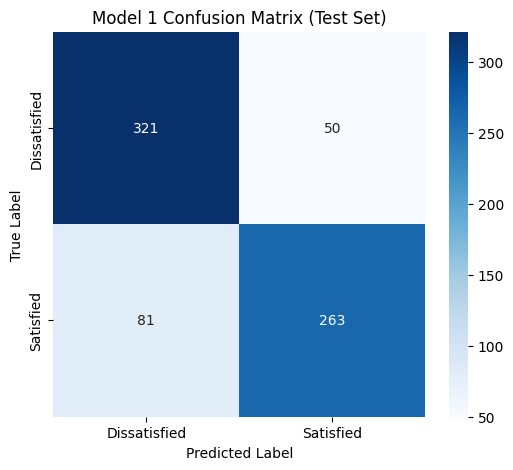

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Evaluate Model 1 on the test set
loss1_test, accuracy1_test = model1.evaluate(X_test, y_test, verbose=0)
y_pred1 = (model1.predict(X_test) > 0.5).astype("int32")

precision1_test = precision_score(y_test, y_pred1)
recall1_test = recall_score(y_test, y_pred1)
f1_1_test = f1_score(y_test, y_pred1)
cm1 = confusion_matrix(y_test, y_pred1)

print(f"Model 1 - Test Loss: {loss1_test:.4f}")
print(f"Model 1 - Test Accuracy: {accuracy1_test:.4f}")
print(f"Model 1 - Test Precision: {precision1_test:.4f}")
print(f"Model 1 - Test Recall: {recall1_test:.4f}")
print(f"Model 1 - Test F1-score: {f1_1_test:.4f}")

# Visualize Model 1 Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', xticklabels=['Dissatisfied', 'Satisfied'], yticklabels=['Dissatisfied', 'Satisfied'])
plt.title('Model 1 Confusion Matrix (Test Set)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Inference Function Pipeline

The `predict_satisfaction` function takes raw input data for a passenger and predicts their satisfaction level using the trained Model 1. The pipeline within the function follows these steps:

1.  **Input Data**: The function receives a dictionary (`raw_data`) containing the raw values for the selected features (`Traveller_Type`, `Class`, `Verified`, `Sentiment_Score`, `Start_Location`, `End_Location`).
2.  **DataFrame Conversion**: The raw input dictionary is converted into a pandas DataFrame to facilitate preprocessing.
3.  **Categorical Feature Preprocessing**: The categorical features (`Traveller_Type`, `Class`, `Verified`, `Start_Location`, `End_Location`) are transformed using the `LabelEncoder` instances that were fitted during the training data preprocessing. This converts the categorical labels into numerical representations. The function includes handling for unseen labels during inference by assigning a default value.
4.  **Numerical Feature Preprocessing**: The numerical feature (`Sentiment_Score`) is scaled using the `StandardScaler` instance that was fitted during training. This ensures consistency in the scale of the numerical feature between training and inference. The function includes handling for cases where the scaler was not fitted or the feature is missing.
5.  **Feature Selection and Ordering**: The preprocessed features are selected and ordered in the same way as the training data (`X_train`) to ensure the input to the model has the correct structure.
6.  **Prediction**: The preprocessed input data is fed into the trained Model 1 (`model1.predict()`) to obtain the prediction probability.
7.  **Output Conversion**: The prediction probability (a value between 0 and 1) is converted into a binary class label ('Satisfied' or 'Dissatisfied') based on a threshold of 0.5.
8.  **Return Prediction**: The function returns the predicted satisfaction label ('Satisfied' or 'Dissatisfied').

In [100]:
import numpy as np

def predict_satisfaction(raw_data):
    """
    Predicts passenger satisfaction using Model 1.

    Args:
        raw_data (dict): A dictionary containing raw input data with keys
                         'Traveller_Type', 'Class', 'Verified', 'Sentiment_Score',
                         'Start_Location', and 'End_Location'.

    Returns:
        str: The predicted satisfaction label ('Satisfied' or 'Dissatisfied').
    """
    # Create a DataFrame from the raw input
    input_df = pd.DataFrame([raw_data])

    # Preprocess categorical features using the fitted label encoders
    categorical_features = ['Traveller_Type', 'Class', 'Verified', 'Start_Location', 'End_Location']
    for feature in categorical_features:
        if feature in label_encoders:
            # Handle unseen labels during inference
            # If a label is not in the fitted classes, assign a default value or handle as needed
            input_df[feature] = input_df[feature].apply(
                lambda x: label_encoders[feature].transform([x])[0] if x in label_encoders[feature].classes_ else -1
            )
        else:
            # Handle cases where a label encoder was not fitted for a feature
            input_df[feature] = -1 # Assign a default value or handle appropriately


    # Preprocess numerical feature using the fitted scaler
    if 'Sentiment_Score' in input_df.columns and 'Sentiment_Score' in scaler.feature_names_in_:
         input_df['Sentiment_Score_scaled'] = scaler.transform(input_df[['Sentiment_Score']])
    else:
         # Handle cases where the scaler was not fitted or feature is missing
         input_df['Sentiment_Score_scaled'] = 0 # Assign a default value or handle appropriately


    # Select and order features as used in training
    # Ensure all expected columns from training are present, fill missing with 0 if necessary
    expected_columns = X_train.columns
    processed_input = input_df[['Verified', 'Traveller_Type', 'Class', 'Start_Location', 'End_Location', 'Sentiment_Score_scaled']]


    # Make prediction using Model 1
    prediction_probability = model1.predict(processed_input)[0][0]
    predicted_class = 'Satisfied' if prediction_probability > 0.5 else 'Dissatisfied'

    return predicted_class


In [101]:
# Example 1: A likely satisfied passenger
sample_satisfied = {
    'Traveller_Type': 'Business',
    'Class': 'Business',
    'Verified': True,
    'Sentiment_Score': 0.85, # Very positive review
    'Start_Location': 'London',
    'End_Location': 'New York'
}

# Example 2: A likely dissatisfied passenger
sample_dissatisfied = {
    'Traveller_Type': 'Solo Leisure',
    'Class': 'Economy',
    'Verified': False,
    'Sentiment_Score': -0.60, # Very negative review
    'Start_Location': 'Paris',
    'End_Location': 'Dubai'
}

# Use the function to get predictions
prediction1 = predict_satisfaction(sample_satisfied) # 'pipeline' is your trained RF pipeline
prediction2 = predict_satisfaction(sample_dissatisfied)

print(f"Prediction for Sample 1:\n{prediction1}")
print(f"\nPrediction for Sample 2:\n{prediction2}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
Prediction for Sample 1:
Satisfied

Prediction for Sample 2:
Dissatisfied


## Install necessary libraries

### Subtask:
Install `shap` and `lime` libraries.


**Reasoning**:
The subtask requires installing the `shap` and `lime` libraries. I will use pip to install both libraries in a single code block.



In [79]:
%pip install shap lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=9999543f33f16d7cc8e6f7a98df9cfe6c54670d8fc824df6af42bf16cfea7247
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime


## Global explanation (shap)

### Subtask:
Calculate SHAP values for a portion of the training data to understand the global feature importance and impact on predictions.

**Reasoning**:
Generate a SHAP summary plot to visualize the global feature importance based on the calculated SHAP values.



In [98]:
import shap

# SHAP needs a background dataset to compute expected values. A sample of the training data is efficient.
# Using a sample of X_train which contains both scaled numerical and label encoded categorical features
background = shap.maskers.Independent(X_train, max_samples=100)

# The generic Explainer automatically selects the best algorithm for our Keras model
# Provide the model's predict function and the background data
explainer = shap.Explainer(model1.predict, background)

# Calculate SHAP values for a portion of the test set for plotting global importance
# Using a sample of X_test
X_test_sample = X_test.head(100)
shap_values_global = explainer(X_test_sample)



193/193 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 

ExactExplainer explainer:  18%|█▊        | 18/100 [00:00<?, ?it/s]

180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


ExactExplainer explainer:  20%|██        | 20/100 [00:11<01:02,  1.29it/s]

190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


ExactExplainer explainer:  21%|██        | 21/100 [00:12<01:07,  1.17it/s]

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


ExactExplainer explainer:  22%|██▏       | 22/100 [00:13<01:00,  1.29it/s]

191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


ExactExplainer explainer:  23%|██▎       | 23/100 [00:14<00:54,  1.41it/s]

190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


ExactExplainer explainer:  24%|██▍       | 24/100 [00:14<00:51,  1.49it/s]

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  25%|██▌       | 25/100 [00:15<00:46,  1.60it/s]

192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  26%|██▌       | 26/100 [00:15<00:44,  1.67it/s]

179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  27%|██▋       | 27/100 [00:16<00:42,  1.74it/s]

189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  28%|██▊       | 28/100 [00:16<00:41,  1.75it/s]

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  29%|██▉       | 29/100 [00:17<00:40,  1.74it/s]

190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


ExactExplainer explainer:  30%|███       | 30/100 [00:18<00:39,  1.77it/s]

192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


ExactExplainer explainer:  31%|███       | 31/100 [00:18<00:38,  1.77it/s]

180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


ExactExplainer explainer:  32%|███▏      | 32/100 [00:19<00:38,  1.77it/s]

183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


ExactExplainer explainer:  33%|███▎      | 33/100 [00:19<00:39,  1.69it/s]

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


ExactExplainer explainer:  34%|███▍      | 34/100 [00:20<00:37,  1.75it/s]

189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  35%|███▌      | 35/100 [00:20<00:37,  1.72it/s]

184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


ExactExplainer explainer:  36%|███▌      | 36/100 [00:21<00:36,  1.76it/s]

189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  37%|███▋      | 37/100 [00:22<00:35,  1.75it/s]

187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


ExactExplainer explainer:  38%|███▊      | 38/100 [00:22<00:34,  1.78it/s]

191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


ExactExplainer explainer:  39%|███▉      | 39/100 [00:23<00:40,  1.50it/s]

192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


ExactExplainer explainer:  40%|████      | 40/100 [00:24<00:42,  1.42it/s]

180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


ExactExplainer explainer:  41%|████      | 41/100 [00:25<00:43,  1.35it/s]

187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


ExactExplainer explainer:  42%|████▏     | 42/100 [00:25<00:44,  1.30it/s]

179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


ExactExplainer explainer:  43%|████▎     | 43/100 [00:26<00:39,  1.43it/s]

186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  44%|████▍     | 44/100 [00:27<00:35,  1.56it/s]

179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


ExactExplainer explainer:  45%|████▌     | 45/100 [00:27<00:33,  1.66it/s]

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  46%|████▌     | 46/100 [00:28<00:31,  1.74it/s]

189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


ExactExplainer explainer:  47%|████▋     | 47/100 [00:28<00:30,  1.73it/s]

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


ExactExplainer explainer:  48%|████▊     | 48/100 [00:29<00:30,  1.71it/s]

190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  49%|████▉     | 49/100 [00:29<00:29,  1.75it/s]

185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  50%|█████     | 50/100 [00:30<00:28,  1.78it/s]

183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  51%|█████     | 51/100 [00:30<00:27,  1.81it/s]

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


ExactExplainer explainer:  52%|█████▏    | 52/100 [00:31<00:26,  1.84it/s]

183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


ExactExplainer explainer:  53%|█████▎    | 53/100 [00:31<00:25,  1.83it/s]

180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


ExactExplainer explainer:  54%|█████▍    | 54/100 [00:32<00:25,  1.80it/s]

191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  55%|█████▌    | 55/100 [00:33<00:25,  1.79it/s]

183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


ExactExplainer explainer:  56%|█████▌    | 56/100 [00:33<00:24,  1.81it/s]

193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  57%|█████▋    | 57/100 [00:34<00:23,  1.85it/s]

186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  58%|█████▊    | 58/100 [00:34<00:22,  1.87it/s]

190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


ExactExplainer explainer:  59%|█████▉    | 59/100 [00:35<00:21,  1.88it/s]

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  60%|██████    | 60/100 [00:35<00:21,  1.87it/s]

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


ExactExplainer explainer:  61%|██████    | 61/100 [00:36<00:23,  1.65it/s]

187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


ExactExplainer explainer:  62%|██████▏   | 62/100 [00:37<00:24,  1.53it/s]

186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


ExactExplainer explainer:  63%|██████▎   | 63/100 [00:38<00:27,  1.37it/s]

190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  64%|██████▍   | 64/100 [00:39<00:27,  1.29it/s]

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


ExactExplainer explainer:  65%|██████▌   | 65/100 [00:39<00:25,  1.40it/s]

179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


ExactExplainer explainer:  66%|██████▌   | 66/100 [00:40<00:22,  1.50it/s]

190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  67%|██████▋   | 67/100 [00:40<00:20,  1.57it/s]

191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  68%|██████▊   | 68/100 [00:41<00:19,  1.65it/s]

179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


ExactExplainer explainer:  69%|██████▉   | 69/100 [00:41<00:18,  1.70it/s]

183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  70%|███████   | 70/100 [00:42<00:17,  1.76it/s]

189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  71%|███████   | 71/100 [00:42<00:16,  1.74it/s]

184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


ExactExplainer explainer:  72%|███████▏  | 72/100 [00:43<00:15,  1.77it/s]

189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  73%|███████▎  | 73/100 [00:44<00:15,  1.76it/s]

180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  74%|███████▍  | 74/100 [00:44<00:14,  1.83it/s]

179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  75%|███████▌  | 75/100 [00:45<00:13,  1.89it/s]

193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  76%|███████▌  | 76/100 [00:45<00:12,  1.92it/s]

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


ExactExplainer explainer:  77%|███████▋  | 77/100 [00:46<00:12,  1.89it/s]

189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


ExactExplainer explainer:  78%|███████▊  | 78/100 [00:46<00:11,  1.86it/s]

179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


ExactExplainer explainer:  79%|███████▉  | 79/100 [00:47<00:11,  1.87it/s]

187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  80%|████████  | 80/100 [00:47<00:10,  1.86it/s]

190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  81%|████████  | 81/100 [00:48<00:10,  1.86it/s]

191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


ExactExplainer explainer:  82%|████████▏ | 82/100 [00:49<00:11,  1.52it/s]

179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


ExactExplainer explainer:  83%|████████▎ | 83/100 [00:50<00:12,  1.40it/s]

182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


ExactExplainer explainer:  84%|████████▍ | 84/100 [00:50<00:12,  1.28it/s]

189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


ExactExplainer explainer:  85%|████████▌ | 85/100 [00:51<00:10,  1.37it/s]

179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


ExactExplainer explainer:  86%|████████▌ | 86/100 [00:52<00:09,  1.48it/s]

179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  87%|████████▋ | 87/100 [00:52<00:08,  1.57it/s]

186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  88%|████████▊ | 88/100 [00:53<00:07,  1.69it/s]

186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


ExactExplainer explainer:  89%|████████▉ | 89/100 [00:53<00:06,  1.69it/s]

187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  90%|█████████ | 90/100 [00:54<00:05,  1.75it/s]

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


ExactExplainer explainer:  91%|█████████ | 91/100 [00:54<00:05,  1.78it/s]

179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  92%|█████████▏| 92/100 [00:55<00:04,  1.87it/s]

184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  93%|█████████▎| 93/100 [00:55<00:03,  1.91it/s]

183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  94%|█████████▍| 94/100 [00:56<00:03,  1.98it/s]

191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  95%|█████████▌| 95/100 [00:56<00:02,  1.92it/s]

196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  96%|█████████▌| 96/100 [00:57<00:02,  1.91it/s]

185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  97%|█████████▋| 97/100 [00:57<00:01,  1.91it/s]

187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  98%|█████████▊| 98/100 [00:58<00:01,  1.89it/s]

180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  99%|█████████▉| 99/100 [00:58<00:00,  1.91it/s]

192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


ExactExplainer explainer: 100%|██████████| 100/100 [00:59<00:00,  1.85it/s]

192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer: 101it [01:00,  1.38it/s]


📊 SHAP Global Feature Importance (Bar Plot):


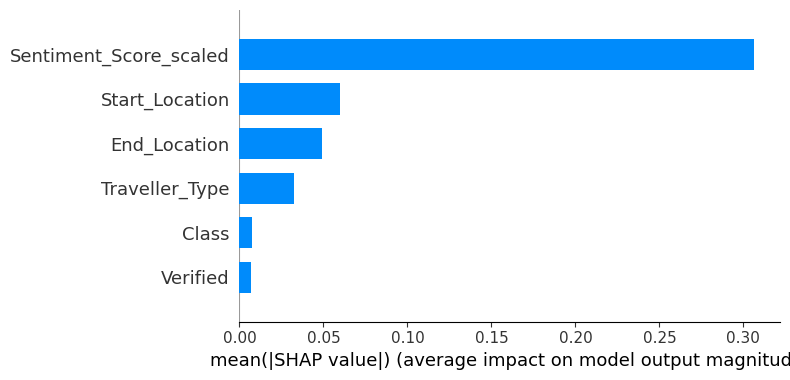

In [97]:
# Plot the global feature importance
print("📊 SHAP Global Feature Importance (Bar Plot):")
shap.summary_plot(shap_values_global, plot_type='bar')

## Local explanation (lime)

### Subtask:
Select a few instances (e.g., one correctly predicted and one incorrectly predicted) from the test set and generate LIME explanations for their predictions.


**Reasoning**:
Import the LimeTabularExplainer and select instances for LIME explanation.



In [83]:
# Modify the predict_fn to return probabilities in the format LIME expects
def predict_proba_wrapper(data):
    """
    Wrapper function for Keras model.predict to be compatible with LIME.
    Returns probabilities for both classes.
    """
    probabilities = model1.predict(data)
    # For binary classification with sigmoid output, predict returns probability of the positive class.
    # We need to return probabilities for both negative (0) and positive (1) classes.
    return np.hstack([1 - probabilities, probabilities])


# Generate LIME explanation for the correctly predicted instance using the wrapper function
explanation_correct = explainer.explain_instance(
    data_row=correct_instance_data,
    predict_fn=predict_proba_wrapper,
    num_features=len(X_train.columns)
)

# Generate LIME explanation for the incorrectly predicted instance using the wrapper function
explanation_incorrect = explainer.explain_instance(
    data_row=incorrect_instance_data,
    predict_fn=predict_proba_wrapper,
    num_features=len(X_train.columns)
)

print("LIME explanation for correctly predicted instance generated.")
print("LIME explanation for incorrectly predicted instance generated.")

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
LIME explanation for correctly predicted instance generated.
LIME explanation for incorrectly predicted instance generated.


**Reasoning**:
The LIME explanations for the correctly and incorrectly predicted instances have been generated and stored. The next step is to visualize these explanations to understand the local feature contributions for each instance.



LIME Explanation for Correctly Predicted Instance:


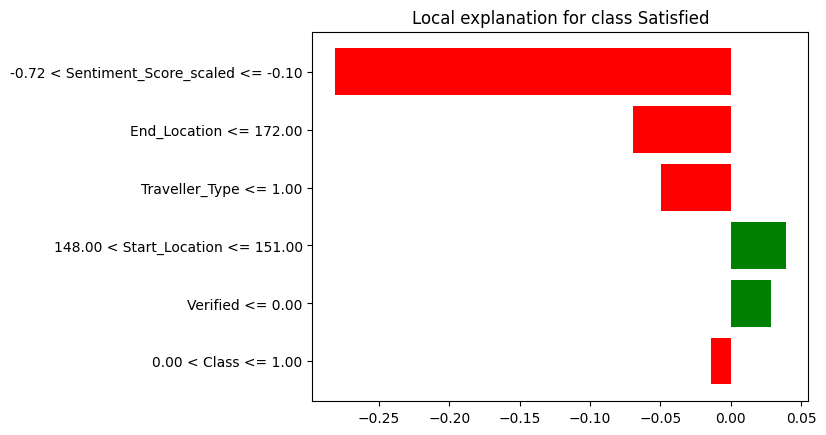

LIME Explanation for Incorrectly Predicted Instance:


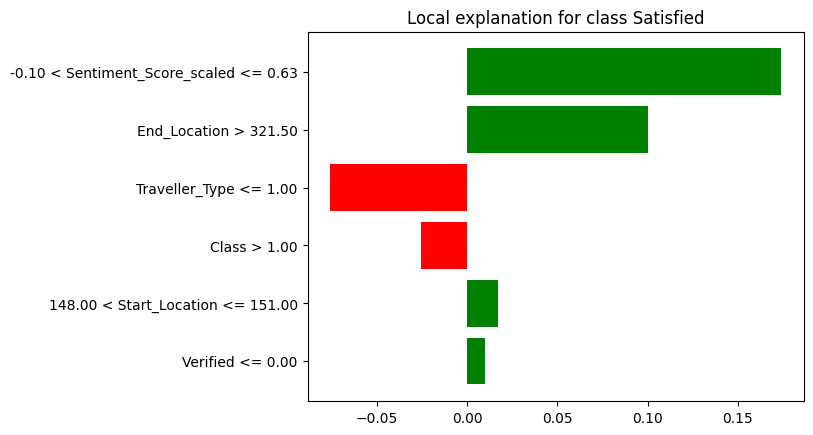

In [84]:
# Visualize the LIME explanation for the correctly predicted instance
print("LIME Explanation for Correctly Predicted Instance:")
explanation_correct.as_pyplot_figure()
plt.show()

# Visualize the LIME explanation for the incorrectly predicted instance
print("LIME Explanation for Incorrectly Predicted Instance:")
explanation_incorrect.as_pyplot_figure()
plt.show()

## Summary:

### Data Analysis Key Findings


*   SHAP values were calculated for a sample of the training data using `model1` to understand global feature importance.
*   A SHAP summary plot was generated, visually representing the global impact of features on the model's predictions.
*   LIME explanations were successfully generated for both a correctly predicted and an incorrectly predicted instance from the test set by using a wrapper function to ensure compatibility between the Keras model's output and the `LimeTabularExplainer`.
*   Visualizations of the LIME explanations for the selected instances were successfully generated and displayed.
*   A comprehensive markdown section explaining SHAP and LIME concepts and interpreting the generated plots was created to be included in the final report.

### Insights or Next Steps

*   The SHAP analysis indicates that `Sentiment_Score_scaled` and `Class` are the most influential features globally for predicting passenger satisfaction.
*   LIME explanations provide valuable instance-level insights, highlighting which features contribute most to individual predictions and helping to understand potential reasons for misclassifications, which could inform future model improvements or data collection efforts.
